# Predicting Graduation Rates using Census Data

## Project Purpose

This project used Census data from 2010 and American Community Survey Data from 2008-2012. With over 500 features available related to demographic characteristics (e.g., percent of males/females, housing conditions, language spoken, unemployment rates), the goal was to try to predict high school graduation rates. 

## What's in this Notebook

1) Data uploading and cleaning.

2) Exploratory analysis, plotting, some subgroup analysis


## Section 1: Data Uploading and Cleaning

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV

In [173]:
grad = pd.read_csv('./GRADUATION_WITH_CENSUS.csv', encoding='latin-1')

In [174]:
print(grad['MAM_RATE_1112'].sort_values(ascending=False).to_string())

9906       PS
3599       PS
3597       PS
3596       PS
3595       PS
3594       PS
3593       PS
3591       PS
3588       PS
3585       PS
3580       PS
3579       PS
3578       PS
3577       PS
3576       PS
3574       PS
3573       PS
3572       PS
3570       PS
3569       PS
3566       PS
3562       PS
3556       PS
3598       PS
3602       PS
3544       PS
3604       PS
3648       PS
3646       PS
3645       PS
3644       PS
3642       PS
3641       PS
3639       PS
3635       PS
3633       PS
3632       PS
3629       PS
3625       PS
3624       PS
3623       PS
3619       PS
3618       PS
3615       PS
3614       PS
3612       PS
3610       PS
3607       PS
3546       PS
3538       PS
5604       PS
3478       PS
3471       PS
3470       PS
3469       PS
3468       PS
3466       PS
3464       PS
3457       PS
3454       PS
3445       PS
3443       PS
3437       PS
3431       PS
3428       PS
3426       PS
3424       PS
3423       PS
3421       PS
3418       PS
3417       PS
3416  

In [175]:
grad.head()

,Unnamed: 0,leaid11,STNAM,Med_HHD_Inc_ACS_08_12,Aggregate_HH_INC_ACS_08_12,Med_House_value_ACS_08_12,Aggr_House_Value_ACS_08_12,Med_HHD_Inc_ACSMOE_08_12,Aggregate_HH_INC_ACSMOE_08_12,Med_House_value_ACSMOE_08_12,...,pct_TEA_MailOutMailBack_CEN_2010,pct_TEA_Update_Leave_CEN_2010,pct_Census_Mail_Returns_CEN_2010,pct_Vacant_CEN_2010,pct_Deletes_CEN_2010,pct_Census_UAA_CEN_2010,pct_Mailback_Count_CEN_2010,pct_FRST_FRMS_CEN_2010,pct_RPLCMNT_FRMS_CEN_2010,pct_BILQ_Mailout_count_CEN_2010
0,117,103150,ALABAMA,12739,26819300,48500,25557500,3704.0,4629764.0,11020.0,...,100.0,0.0,57.02,2.84,0.00,17.65,79.52,47.82,9.20,0.0
1,130,103510,ALABAMA,14516,7534000,24900,21646000,4749.0,2794298.0,26827.0,...,0.0,100.0,47.56,25.97,2.44,0.00,71.59,47.56,0.00,0.0
2,116,103120,ALABAMA,14583,25557000,71600,18761500,2974.0,4458785.0,17805.0,...,100.0,0.0,68.41,2.96,0.00,13.40,83.64,63.01,5.40,0.0
3,60,101620,ALABAMA,16659,14805300,44600,17711500,9287.0,5012557.0,20122.0,...,100.0,0.0,50.07,4.28,0.00,29.93,65.79,43.17,6.90,0.0
4,97,102610,ALABAMA,17321,22260600,56000,26267000,12223.0,5547270.0,55655.0,...,100.0,0.0,59.32,3.81,0.00,22.59,73.61,53.33,5.99,0.0


In [176]:
grad.shape

(9907, 580)

There are a few variables that represent graduation rates for different races and ethnicities. There are strings in those variables (e.g., GE50 for greater than or equal to 50) that need to be converted to numbers. These functions are from another DSI student, can't take credit for them. 

In [177]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
 
    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass
 
    return False

grad['MAM_RATE_1112'].apply(is_number)
grad['MAS_RATE_1112'].apply(is_number)
grad['MBL_RATE_1112'].apply(is_number)
grad['MHI_RATE_1112'].apply(is_number)
grad['MTR_RATE_1112'].apply(is_number)
grad['ECD_RATE_1112'].apply(is_number)
grad['MWH_RATE_1112'].apply(is_number)
grad['CWD_RATE_1112'].apply(is_number)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
9877    False
9878    False
9879    False
9880    False
9881    False
9882    False
9883    False
9884    False
9885    False
9886    False
9887     True
9888    False
9889    False
9890    False
9891    False
9892    False
9893    False
9894    False
9895     True
9896    False
9897    False
9898    False
9899    False
9900    False
9901    False
9902    False
9903    False
9904    False
9905    False
9906    False
Name: CWD_RATE_1112, Length: 9907, dtype: bool

In [178]:
def string_parser(string):
    if isinstance(string, int) or isinstance(string, float):
        return float(string)
    if len(string)==5:
        return (int(string[3:])-2) #pick the middle number if given about range
    if len(string)==2 and is_number(string):
        return int(string)
    if string[:2] == 'GE' or string[:2] == 'GT':
        return int(string[2:4])
    if string[:2] == 'LE' or string[:2] == 'LT':
        return int(string[2:4])
    else:
        return 0
grad['MAM_RATE_1112'] = grad['MAM_RATE_1112'].apply(string_parser)
grad['MAS_RATE_1112'] = grad['MAS_RATE_1112'].apply(string_parser)
grad['MBL_RATE_1112'] = grad['MBL_RATE_1112'].apply(string_parser)
grad['MHI_RATE_1112'] = grad['MHI_RATE_1112'].apply(string_parser)
grad['MTR_RATE_1112'] = grad['MTR_RATE_1112'].apply(string_parser)
grad['MWH_RATE_1112'] = grad['MWH_RATE_1112'].apply(string_parser)
#grad['CWD_RATE_1112'] = grad['ECD_RATE_1112'].apply(string_parser)

In [179]:
print(grad.isnull().sum().to_string())

Unnamed: 0                             0
leaid11                                0
STNAM                                  0
Med_HHD_Inc_ACS_08_12                  0
Aggregate_HH_INC_ACS_08_12             0
Med_House_value_ACS_08_12              0
Aggr_House_Value_ACS_08_12             0
Med_HHD_Inc_ACSMOE_08_12              86
Aggregate_HH_INC_ACSMOE_08_12         84
Med_House_value_ACSMOE_08_12         139
Aggr_House_Value_ACSMOE_08_12        157
FIPST                                  0
leanm11                                0
ALL_COHORT_1112                        0
ALL_RATE_1112                        122
MAM_COHORT_1112                     6114
MAM_RATE_1112                       6114
MAS_COHORT_1112                     4771
MAS_RATE_1112                       4771
MBL_COHORT_1112                     3623
MBL_RATE_1112                       3623
MHI_COHORT_1112                     2674
MHI_RATE_1112                       2674
MTR_COHORT_1112                     5750
MTR_RATE_1112   

### Dealing with Null values

#### Dropping rows where the target variable, ALL_RATE_1112 is NaN. 
It doesn't feel right to impute values of my target variable. 

In [180]:
grad = grad.dropna(subset=['ALL_RATE_1112'])

#### Dropping various other rows to get rid of nulls

In [181]:
grad = grad.dropna(subset=['Tot_Population_ACS_08_12'])
grad = grad.dropna(subset=['pct_Pop_18_24_ACS_08_12'])
grad = grad.dropna(subset=['pct_Crowd_Occp_U_ACS_08_12'])
grad = grad.dropna(subset=['pct_Rel_Family_HHDS_CEN_2010'])
grad = grad.dropna(subset=['pct_Civ_emp_65p_ACS_08_12'])
grad = grad.dropna(subset=['pct_Civ_emp_16_24_ACS_08_12'])
grad = grad.dropna(subset=['pct_Civ_emp_25_44_ACS_08_12'])

#### Replacing nulls with 0
These columns represent various races and ethnicities in the graduation cohort. I may use these as features so I will replace null values in these columns with 0

In [182]:
grad['MAM_RATE_1112'].fillna(0, inplace=True)
grad['MAS_RATE_1112'].fillna(0, inplace=True)
grad['MBL_RATE_1112'].fillna(0, inplace=True)
grad['MHI_RATE_1112'].fillna(0, inplace=True)
grad['MTR_RATE_1112'].fillna(0, inplace=True)
grad['MWH_RATE_1112'].fillna(0, inplace=True)
grad['CWD_RATE_1112'].fillna(0, inplace=True)
grad['ECD_RATE_1112'].fillna(0, inplace=True)

#### Dropping all columns that are margin of error, as I will not use them as features. 
I had asked Dave whether I should be concerned about high MOE, and he said not to really worry about it. So I won't. 

In [183]:
for col in grad.columns:
    if 'ACSMOE' in col:
        grad.drop(col, axis=1, inplace=True)

Now I have all the variables I think I will use with no null values. Some variables like "Flag" or the "Rate" variables still have nulls, but I won't be using those features, so I'll just leave them be for now. 

In [184]:
print(grad.isnull().sum().to_string())

Unnamed: 0                             0
leaid11                                0
STNAM                                  0
Med_HHD_Inc_ACS_08_12                  0
Aggregate_HH_INC_ACS_08_12             0
Med_House_value_ACS_08_12              0
Aggr_House_Value_ACS_08_12             0
FIPST                                  0
leanm11                                0
ALL_COHORT_1112                        0
ALL_RATE_1112                          0
MAM_COHORT_1112                     5928
MAM_RATE_1112                          0
MAS_COHORT_1112                     4601
MAS_RATE_1112                          0
MBL_COHORT_1112                     3468
MBL_RATE_1112                          0
MHI_COHORT_1112                     2544
MHI_RATE_1112                          0
MTR_COHORT_1112                     5545
MTR_RATE_1112                          0
MWH_COHORT_1112                      106
MWH_RATE_1112                          0
CWD_COHORT_1112                      290
CWD_RATE_1112   

#### Since I have dropped some rows, I am resetting the index since I think sometimes having missing indices messes up code in the future

In [185]:
grad.reset_index()

,index,Unnamed: 0,leaid11,STNAM,Med_HHD_Inc_ACS_08_12,Aggregate_HH_INC_ACS_08_12,Med_House_value_ACS_08_12,Aggr_House_Value_ACS_08_12,FIPST,leanm11,...,pct_TEA_MailOutMailBack_CEN_2010,pct_TEA_Update_Leave_CEN_2010,pct_Census_Mail_Returns_CEN_2010,pct_Vacant_CEN_2010,pct_Deletes_CEN_2010,pct_Census_UAA_CEN_2010,pct_Mailback_Count_CEN_2010,pct_FRST_FRMS_CEN_2010,pct_RPLCMNT_FRMS_CEN_2010,pct_BILQ_Mailout_count_CEN_2010
0,0,117,103150,ALABAMA,12739,26819300,48500,25557500,1,Talladega City,...,100.00,0.00,57.02,2.84,0.00,17.65,79.52,47.82,9.20,0.0
1,2,116,103120,ALABAMA,14583,25557000,71600,18761500,1,Sylacauga City,...,100.00,0.00,68.41,2.96,0.00,13.40,83.64,63.01,5.40,0.0
2,3,60,101620,ALABAMA,16659,14805300,44600,17711500,1,Gadsden City,...,100.00,0.00,50.07,4.28,0.00,29.93,65.79,43.17,6.90,0.0
3,4,97,102610,ALABAMA,17321,22260600,56000,26267000,1,Opp City,...,100.00,0.00,59.32,3.81,0.00,22.59,73.61,53.33,5.99,0.0
4,5,54,101410,ALABAMA,18106,56256200,108400,198818000,1,Eufaula City,...,100.00,0.00,63.17,2.42,0.00,12.85,84.74,56.17,7.00,0.0
5,6,115,103090,ALABAMA,21000,18241700,58100,45765000,1,Sumter County,...,0.00,100.00,40.46,23.29,4.11,0.00,72.60,40.46,0.00,0.0
6,7,112,103000,ALABAMA,21123,24997800,46500,45680000,1,Sheffield City,...,100.00,0.00,59.45,4.10,0.00,14.89,81.01,49.81,9.64,0.0
7,8,66,101720,ALABAMA,21380,62272900,63700,88004000,1,Haleyville City,...,93.26,6.74,57.82,5.10,1.17,23.31,70.41,51.97,5.85,0.0
8,9,111,102970,ALABAMA,22156,52270600,66600,64742500,1,Selma City,...,100.00,0.00,53.98,3.43,0.00,22.54,74.03,48.45,5.52,0.0
9,10,47,101200,ALABAMA,22348,73159100,80500,94214100,1,Demopolis City,...,100.00,0.00,57.55,3.52,0.00,20.63,75.85,50.35,7.20,0.0


## Section 2: Exploratory Stuff: Correlations, Plotting, and Subgroup Analysis

In [186]:
grad['ALL_RATE_1112'].describe()

count    9595.000000
mean       83.067483
std        11.882854
min        18.000000
25%        80.000000
50%        87.000000
75%        92.000000
max        99.000000
Name: ALL_RATE_1112, dtype: float64

(array([   5.,    3.,    8.,    7.,   17.,  517.,   39.,   76.,  184.,
         338.,  925., 1697., 1842., 2644., 1293.]),
 array([18. , 23.4, 28.8, 34.2, 39.6, 45. , 50.4, 55.8, 61.2, 66.6, 72. ,
        77.4, 82.8, 88.2, 93.6, 99. ]),
 <a list of 15 Patch objects>)

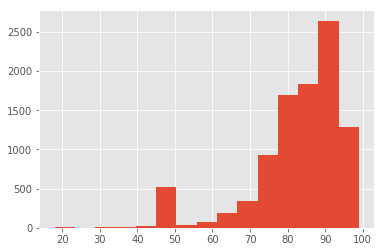

In [187]:
plt.hist(grad['ALL_RATE_1112'].dropna(), bins = 15)

In [188]:
grad.groupby(['STNAM'])['ALL_RATE_1112'].mean().sort_values(ascending=False)

STNAM
TENNESSEE               90.209402
OHIO                    90.166944
PENNSYLVANIA            89.137195
WISCONSIN               88.412000
NEW JERSEY              88.316794
CONNECTICUT             88.079167
INDIANA                 87.743945
MASSACHUSETTS           87.538462
MARYLAND                87.521739
NEW HAMPSHIRE           86.854167
IOWA                    86.822884
ARKANSAS                85.382479
CALIFORNIA              85.294118
TEXAS                   84.263130
NEW YORK                83.794643
ILLINOIS                83.723992
VERMONT                 83.338983
MAINE                   83.090909
MISSOURI                82.971461
MINNESOTA               82.970769
VIRGINIA                82.194215
KANSAS                  82.116667
UTAH                    82.025641
NORTH CAROLINA          81.447368
WEST VIRGINIA           81.433962
RHODE ISLAND            81.233333
HAWAII                  81.000000
OREGON                  80.000000
MICHIGAN                79.548780
ALABAMA 

I created a sub-dataframe for the acs and census variables that I will use in some analysis. This is more for my own organization so that I can easily isolate and run analyses on variables that I know I want to look at. For example, I am not including variables that cannot be used as strategies to improve graduation (e.g., census operational variables, percentage of males, or percentage of females, percentage of white people). A strategy to improve graduation cannot be "have more males, or be white." 

In [189]:
features_to_use = grad[['Med_HHD_Inc_ACS_08_12', 'ALL_RATE_1112','MAM_RATE_1112','MAS_RATE_1112', 'MBL_RATE_1112', 
            'MHI_RATE_1112', 'MTR_RATE_1112', 'CWD_COHORT_1112','ECD_RATE_1112', 'MWH_RATE_1112',
            'pct_Not_HS_Grad_ACS_08_12', 'pct_Othr_Lang_ACS_08_12','pct_Age5p_Only_Eng_ACS_08_12',
            'pct_College_ACS_08_12', 'pct_Othr_Lang_ACS_08_12', 'pct_Age5p_Only_Eng_ACS_08_12', 
            'pct_Prs_Blw_Pov_Lev_ACS_08_12', 'pct_Civ_emp_16p_ACS_08_12', 'pct_Civ_unemp_16p_ACS_08_12',
            'pct_Civ_emp_16_24_ACS_08_12','pct_Civ_unemp_16_24_ACS_08_12','pct_Civ_emp_25_44_ACS_08_12',
            'pct_Civ_unemp_25_44_ACS_08_12','pct_Civ_emp_45_64_ACS_08_12','pct_Civ_unemp_45_64_ACS_08_12',
            'pct_Civ_emp_65p_ACS_08_12','pct_Civ_unemp_65p_ACS_08_12','pct_Diff_HU_1yr_Ago_ACS_08_12',
            'pct_Born_US_ACS_08_12', 'pct_Born_foreign_ACS_08_12', 'pct_US_Cit_Nat_ACS_08_12', 
            'pct_NON_US_Cit_ACS_08_12', 'pct_Rel_Family_HHD_ACS_08_12', 'pct_MrdCple_HHD_ACS_08_12',
            'pct_Not_MrdCple_HHD_ACS_08_12', 'pct_Female_No_HB_ACS_08_12', 'pct_NonFamily_HHD_ACS_08_12',
            'pct_Sngl_Prns_HHD_ACS_08_12', 'avg_Tot_Prns_in_HHD_ACS_08_12', 'pct_PUB_ASST_INC_ACS_08_12',
            'pct_Tot_Occp_Units_ACS_08_12', 'pct_Vacant_Units_ACS_08_12', 'pct_Renter_Occp_HU_ACS_08_12',
            'pct_Owner_Occp_HU_ACS_08_12', 'pct_Single_Unit_ACS_08_12', 'pct_MLT_U2_9_STRC_ACS_08_12',
            'pct_MLT_U10p_ACS_08_12', 'pct_Mobile_Homes_ACS_08_12', 'pct_Crowd_Occp_U_ACS_08_12',
            'pct_NO_PH_SRVC_ACS_08_12', 'pct_No_Plumb_ACS_08_12', 'pct_Recent_Built_HU_ACS_08_12',
            'pct_URBANIZED_AREA_POP_CEN_2010',
            'pct_URBAN_CLUSTER_POP_CEN_2010', 'pct_RURAL_POP_CEN_2010', 'pct_Tot_GQ_CEN_2010', 
            'pct_Inst_GQ_CEN_2010', 'pct_Non_Inst_GQ_CEN_2010', 'pct_Rel_Family_HHDS_CEN_2010', 
            'pct_MrdCple_HHD_CEN_2010', 'pct_Not_MrdCple_HHD_CEN_2010', 'pct_Female_No_HB_CEN_2010', 
            'pct_NonFamily_HHD_CEN_2010', 'pct_Sngl_Prns_HHD_CEN_2010', 'avg_Tot_Prns_in_HHD_CEN_2010', 
            'pct_Tot_Occp_Units_CEN_2010', 'pct_Vacant_Units_CEN_2010','pct_Renter_Occp_HU_CEN_2010', 
            'pct_Owner_Occp_HU_CEN_2010']].copy()
features_to_use.head()

,Med_HHD_Inc_ACS_08_12,ALL_RATE_1112,MAM_RATE_1112,MAS_RATE_1112,MBL_RATE_1112,MHI_RATE_1112,MTR_RATE_1112,CWD_COHORT_1112,ECD_RATE_1112,MWH_RATE_1112,...,pct_MrdCple_HHD_CEN_2010,pct_Not_MrdCple_HHD_CEN_2010,pct_Female_No_HB_CEN_2010,pct_NonFamily_HHD_CEN_2010,pct_Sngl_Prns_HHD_CEN_2010,avg_Tot_Prns_in_HHD_CEN_2010,pct_Tot_Occp_Units_CEN_2010,pct_Vacant_Units_CEN_2010,pct_Renter_Occp_HU_CEN_2010,pct_Owner_Occp_HU_CEN_2010
0,12739,77.0,0.0,0.0,77.0,0.0,0.0,21.0,70-74,72.0,...,20.17,79.83,37.40,36.71,33.31,2.3849,87.02,12.98,63.60,36.40
2,14583,70.0,0.0,0.0,62.0,0.0,0.0,15.0,60-64,77.0,...,23.61,76.39,21.37,50.15,45.95,2.1171,88.59,11.41,70.54,29.46
3,16659,75.0,0.0,0.0,77.0,57.0,0.0,66.0,70-74,77.0,...,27.58,72.42,24.60,43.25,38.10,2.4782,74.45,25.55,50.20,49.80
4,17321,82.0,0.0,0.0,80.0,0.0,0.0,13.0,70-79,87.0,...,46.09,53.91,18.97,30.45,25.79,2.5241,84.53,15.47,44.76,55.24
5,18106,72.0,0.0,0.0,67.0,0.0,0.0,24.0,65-69,82.0,...,34.98,65.02,28.76,31.89,29.65,2.5689,91.35,8.65,51.96,48.04


In [190]:
#print(grad.corr()[['ALL_RATE_1112']].abs().sort_values('ALL_RATE_1112', ascending=False).to_string())
print(features_to_use.corr()[['ALL_RATE_1112']].sort_values('ALL_RATE_1112', ascending=False).to_string())

                                 ALL_RATE_1112
ALL_RATE_1112                         1.000000
MWH_RATE_1112                         0.719002
Med_HHD_Inc_ACS_08_12                 0.293821
pct_Tot_Occp_Units_ACS_08_12          0.288979
pct_Tot_Occp_Units_CEN_2010           0.272089
pct_College_ACS_08_12                 0.249022
pct_MrdCple_HHD_CEN_2010              0.203599
pct_MrdCple_HHD_ACS_08_12             0.191729
pct_URBANIZED_AREA_POP_CEN_2010       0.149692
MHI_RATE_1112                         0.148306
pct_Civ_emp_16p_ACS_08_12             0.144242
pct_Civ_emp_25_44_ACS_08_12           0.135985
MAS_RATE_1112                         0.117903
pct_Rel_Family_HHD_ACS_08_12          0.116750
pct_Rel_Family_HHDS_CEN_2010          0.116542
pct_Owner_Occp_HU_CEN_2010            0.116081
pct_Owner_Occp_HU_ACS_08_12           0.113955
pct_Civ_emp_16_24_ACS_08_12           0.104398
pct_US_Cit_Nat_ACS_08_12              0.103320
pct_Single_Unit_ACS_08_12             0.091823
pct_Civ_emp_4

#### I created a couple variables to segment the df into high and low graduation rates. 

In [191]:
grad['low_grad'] = grad['ALL_RATE_1112'] <= grad['ALL_RATE_1112'].mean()

In [192]:
grad['high_grad'] = grad['ALL_RATE_1112'] > grad['ALL_RATE_1112'].mean()

In [193]:
grad['reallylow_grad'] = grad['ALL_RATE_1112'] < 50

#### I created this dichotomous variable for high (1) and low (0) graduation rate so I can use GroupBy and also for  it in classification analyses later

In [194]:
bins = [0, 84, 100]
labels = [0,1]
grad['grad_categories'] = pd.cut(grad['ALL_RATE_1112'], bins=bins, labels=labels)
grad['grad_categories'].value_counts()

1    5564
0    4031
Name: grad_categories, dtype: int64

In [195]:
#I created a different .csv file so I could try out some Tableau visuals
grad.to_csv('grad2.csv', index=False)

#### I used groupby to examine some variables against the high/low graduation variable, based on correlations with each. This is really just for me to get a sense of where differences may lie.

In [196]:
#print(grad.corr()[['low_grad']].sort_values('low_grad', ascending=False).to_string())

In [197]:
print(grad.corr()[['high_grad']].sort_values('high_grad', ascending=False).to_string())

                                  high_grad
high_grad                          1.000000
ALL_RATE_1112                      0.755314
MWH_RATE_1112                      0.531337
pct_FRST_FRMS_CEN_2010             0.306823
pct_Census_Mail_Returns_CEN_2010   0.297271
Med_HHD_Inc_ACS_08_12              0.269916
Aggregate_HH_INC_ACS_08_12         0.265259
NH_White_alone_CEN_2010            0.260058
NH_White_alone_ACS_08_12           0.257393
College_ACS_08_12                  0.250520
pct_Mailback_Count_CEN_2010        0.246713
FRST_FRMS_CEN_2010                 0.243829
Civ_emp_45_64_ACS_08_12            0.235661
MrdCple_Fmly_HHD_CEN_2010          0.234356
pct_Tot_Occp_Units_ACS_08_12       0.232763
MrdCple_Fmly_HHD_ACS_08_12         0.232271
Census_Mail_Returns_CEN_2010       0.232218
Civ_labor_45_64_ACS_08_12          0.230029
pct_College_ACS_08_12              0.224519
Civ_emp_16plus_ACS_08_12           0.223551
Aggr_House_Value_ACS_08_12         0.221458
pct_Tot_Occp_Units_CEN_2010     

In [198]:
print(grad.corr()[['pct_NH_AIAN_alone_ACS_08_12']].sort_values('pct_NH_AIAN_alone_ACS_08_12', ascending=False).to_string())

                                  pct_NH_AIAN_alone_ACS_08_12
pct_NH_AIAN_alone_ACS_08_12                          1.000000
pct_NH_AIAN_alone_CEN_2010                           0.990845
NH_AIAN_alone_CEN_2010                               0.868896
NH_AIAN_alone_ACS_08_12                              0.861420
AIAN_LAND                                            0.630423
pct_ENG_VW_OTHER_ACS_08_12                           0.439811
pct_Age5p_NativeNAm_ACS_08_12                        0.433291
Age5p_Navajo_ACS_08_12                               0.377589
MAM_COHORT_1112                                      0.361689
ENG_VW_OTHER_ACS_08_12                               0.356190
pct_PUB_ASST_INC_ACS_08_12                           0.341872
pct_Crowd_Occp_U_ACS_08_12                           0.341310
MAM_RATE_1112                                        0.337267
pct_Age5p_Navajo_ACS_08_12                           0.334544
pct_No_Plumb_ACS_08_12                               0.317369
LAND_ARE

In [199]:
print(grad.corr()[['MAM_RATE_1112']].sort_values('MAM_RATE_1112', ascending=False).to_string())

                                  MAM_RATE_1112
MAM_RATE_1112                          1.000000
MTR_COHORT_1112                        0.428562
MWH_COHORT_1112                        0.424166
ALL_COHORT_1112                        0.399083
MAM_COHORT_1112                        0.395142
CWD_COHORT_1112                        0.364767
pct_NH_AIAN_alone_CEN_2010             0.340770
MAS_RATE_1112                          0.338520
pct_NH_AIAN_alone_ACS_08_12            0.337267
ECD_COHORT_1112                        0.312572
NH_AIAN_alone_CEN_2010                 0.310956
AIAN_LAND                              0.304166
NH_AIAN_alone_ACS_08_12                0.301119
MTR_RATE_1112                          0.279842
MBL_COHORT_1112                        0.269706
MHI_COHORT_1112                        0.266938
LEP_COHORT_1112                        0.227762
MHI_RATE_1112                          0.226155
MAS_COHORT_1112                        0.218183
pct_Rel_Under_6_CEN_2010               0

In [200]:
print(grad.corr()[['Females_ACS_08_12']].sort_values('Females_ACS_08_12', ascending=False).to_string())

                                  Females_ACS_08_12
Females_ACS_08_12                          1.000000
Females_CEN_2010                           0.984008
Tot_Population_ACS_08_12                   0.982658
Pop_1yr_Over_ACS_08_12                     0.982228
Pov_Univ_ACS_08_12                         0.980448
Tot_Prns_in_HHD_ACS_08_12                  0.980285
Pop_5yrs_Over_ACS_08_12                    0.979647
Tot_Population_CEN_2010                    0.971694
Tot_Prns_in_HHD_CEN_2010                   0.970871
Born_US_ACS_08_12                          0.953171
Rel_Family_HHDS_CEN_2010                   0.943776
Rel_Family_HHD_ACS_08_12                   0.943396
Civ_labor_16plus_ACS_08_12                 0.943255
Pop_25yrs_Over_ACS_08_12                   0.943143
Tot_Occp_Units_ACS_08_12                   0.936572
Tot_Occp_Units_CEN_2010                    0.935848
Males_CEN_2010                             0.934675
HHD_PPL_Und_18_CEN_2010                    0.930736
Males_ACS_08